In [2]:

import pandas as pd
import numpy as np

# Load the dataset
diabetes_data = pd.read_csv('/content/diabetes.csv')

# Display the first few rows of the dataset
print(diabetes_data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
#preprocesssing

# Drop the 'Pregnancies' and 'SkinThickness' columns
diabetes_data = diabetes_data.drop(['Pregnancies', 'SkinThickness'], axis=1)
diabetes_data = diabetes_data.drop(['DiabetesPedigreeFunction'], axis=1)
diabetes_data = diabetes_data.drop(['Insulin'], axis=1)
# Add a new 'Gender' column with random values 'Male' or 'Female'
np.random.seed(42)  # For reproducibility
diabetes_data['Gender'] = np.random.choice(['Male', 'Female'], size=len(diabetes_data))

# Display the first few rows of the modified dataset
print(diabetes_data.head())

# Check if the 'Pregnancies' and 'SkinThickness' are deleted and 'Gender' is added
print("Columns after modification:\n", diabetes_data.columns)
# rearraging the colums
new_order = ["Gender","Age","BMI","BloodPressure","Glucose","Outcome"]
diabetes_data = diabetes_data[new_order]
print(diabetes_data.head())

   Glucose  BloodPressure   BMI  Age  Outcome  Gender
0      148             72  33.6   50        1    Male
1       85             66  26.6   31        0  Female
2      183             64  23.3   32        1    Male
3       89             66  28.1   21        0    Male
4      137             40  43.1   33        1    Male
Columns after modification:
 Index(['Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome', 'Gender'], dtype='object')
   Gender  Age   BMI  BloodPressure  Glucose  Outcome
0    Male   50  33.6             72      148        1
1  Female   31  26.6             66       85        0
2    Male   32  23.3             64      183        1
3    Male   21  28.1             66       89        0
4    Male   33  43.1             40      137        1


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# Encode the 'Gender' feature (convert 'Male'/'Female' to 0 and 1)


label_encoder = LabelEncoder()
diabetes_data['Gender'] = label_encoder.fit_transform(diabetes_data['Gender'])


In [5]:
print(diabetes_data.head())

   Gender  Age   BMI  BloodPressure  Glucose  Outcome
0       1   50  33.6             72      148        1
1       0   31  26.6             66       85        0
2       1   32  23.3             64      183        1
3       1   21  28.1             66       89        0
4       1   33  43.1             40      137        1


In [6]:

# Replace 0s with NaN in relevant columns (except Gender)
columns_to_replace = ['Glucose', 'BloodPressure','BMI']
diabetes_data[columns_to_replace] = diabetes_data[columns_to_replace].replace(0, np.nan)

# Fill NaN values with mean/median
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace=True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace=True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace=True)

# Features and target
X = diabetes_data.drop("Outcome", axis=1)  # Features: remove the 'Outcome' column
y = diabetes_data["Outcome"]  # Target: 'Outcome'

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Build the optimized model
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(X_train.shape[1],)))  # Adjusted to match new feature count
model.add(BatchNormalization())
model.add(Dropout(0.2))  # Add dropout to prevent overfitting

model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(6, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
# Save the best model
checkpoint = ModelCheckpoint("best_optimized_model.keras", monitor="val_accuracy", save_best_only=True, mode="max")
# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

# Load the best saved model
best_model = tf.keras.models.load_model("best_optimized_model.keras")

# Evaluate on test data
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Optimized Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.4849 - loss: 0.7605 - val_accuracy: 0.6494 - val_loss: 0.6374
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5374 - loss: 0.7014 - val_accuracy: 0.6580 - val_loss: 0.6262
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5513 - loss: 0.6895 - val_accuracy: 0.6667 - val_loss: 0.6147
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5738 - loss: 0.6371 - val_accuracy: 0.6667 - val_loss: 0.6065
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5543 - loss: 0.6439 - val_accuracy: 0.6753 - val_loss: 0.5987
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6838 - loss: 0.5952 - val_accuracy: 0.6753 - val_loss: 0.5892
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6066 - loss: 0.6253 - val_accuracy: 0.6926 - val_loss: 0.5793
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6552 - loss: 0.6010 - val_accuracy: 0.6926

In [7]:
# Load the best saved model
best_model = tf.keras.models.load_model("best_optimized_model.keras")

# Evaluate on test data
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
model.save('DL_optimized_model.h5')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7905 - loss: 0.4458  


Test Accuracy: 0.7706


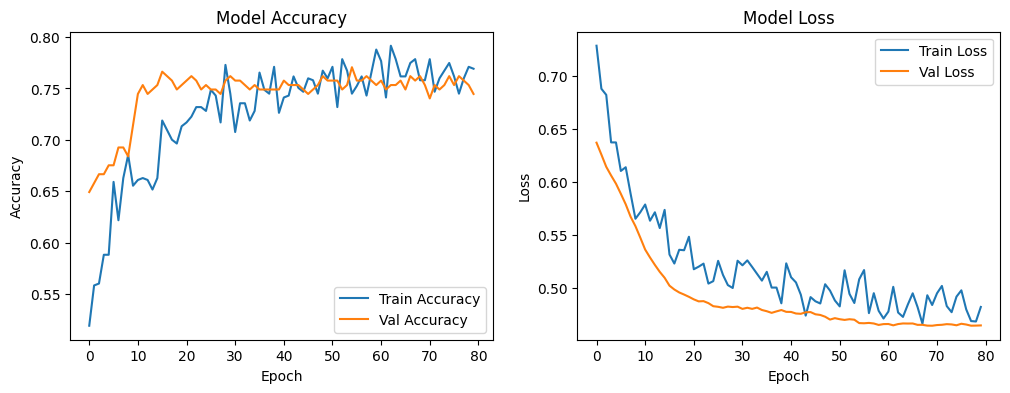

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()

In [10]:

diabetes_data.to_csv('modified_diabetes_dataset.csv', index=False)
